In [2]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [3]:
## Import training and test data sets
train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
test_original = test

In [4]:
#Removes duplicates if there are any
test.drop_duplicates
train.drop_duplicates

<bound method DataFrame.drop_duplicates of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
6    LP001013    Male     Yes          0  Not Graduate            No   
7    LP001014    Male     Yes         3+      Graduate            No   
8    LP001018    Male     Yes          2      Graduate            No   
9    LP001020    Male     Yes          1      Graduate            No   
10   LP001024    Male     Yes          2      Graduate            No   
11   LP001027    Male     Yes          2      Graduate           NaN   
12   LP001028    Male

In [5]:
##Drop ID Column so it does not influence ML alogrithm
train=train.drop(train.columns[[0]],1)
test=test.drop(test.columns[[0]],1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [5]:
## Finds which attributes have missing data and what perecentage are missing
## If percentage is too high we will remove the column
print(train.isnull().sum()/len(train) * 100) 
print(test.isnull().sum()/len(test) * 100)

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64


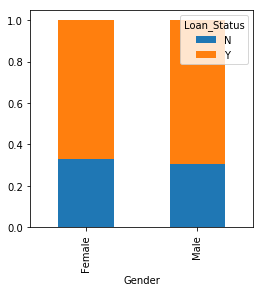

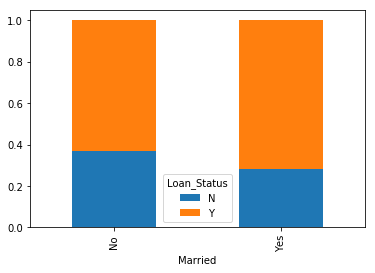

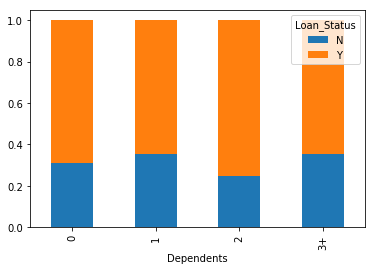

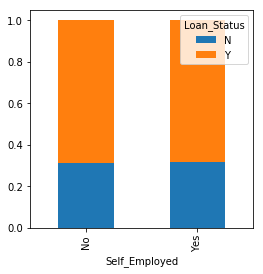

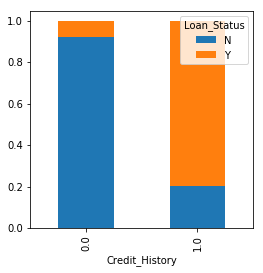

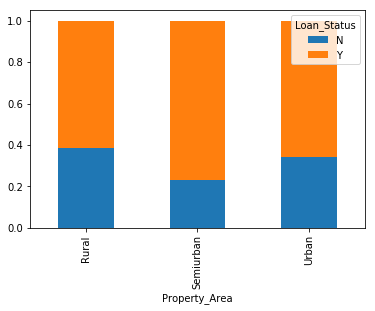

In [6]:
# Examine the categorical fields to see if they directly impact the independent variable
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

In [7]:
## Removing the 3 rows without married status
train=train[train.Married.notnull()]
#  Credit History seems important so we dont want the 50 missing datapoints to skew data
train=train[train.Credit_History.notnull()]
#train=train[train.Self_Employed.notnull()]
#train=train[train.LoanAmount.notnull()]
#train=train[train.Loan_Amount_Term.notnull()]
#train=train[train.Gender.notnull()]

In [8]:
## Ideally all categorical fields with null values would be removed but the quantities are too high for the rest
## Instead we will use the mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)


In [9]:
# Now manipulate the test data the same way
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

In [10]:
## Next we will take care of missing numerical values by using the median
train['LoanAmount'].fillna(train.loc[:,"LoanAmount"].median(), inplace=True)
train['Loan_Amount_Term'].fillna(train.loc[:,"LoanAmount"].median(), inplace=True)

In [11]:
# Again for test
test['LoanAmount'].fillna(test.loc[:,"LoanAmount"].median(), inplace=True)
test['Loan_Amount_Term'].fillna(test.loc[:,"LoanAmount"].median(), inplace=True)

In [12]:
## Test to see if we still have null values
print(train.isnull().sum())
print(test.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [13]:
## Remove outliers/correct skewness
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])
train=train.drop('LoanAmount',axis=1)
test=test.drop('LoanAmount',axis=1)

In [14]:
## After examining the data we've noticed that in the dependendents column end at 3+
## Lets change this to ensure all values are numeric
train=train.replace('3+',4)
test=test.replace('3+',4)

In [15]:
## Now that we have cleaned the data we can split the training data between dependent variables 
## and independent variables
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [17]:
## lets encode our categorical values with dummy values (use drop first to avoid dummy variable trap)
X['Dependents']= X['Dependents'].astype('int64')
X=pd.get_dummies(X, drop_first = True)
y=pd.get_dummies(y, drop_first = True)


test['Dependents'] = test['Dependents'].astype('int64')
test=pd.get_dummies(test, drop_first = True)

In [18]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,360.0,1.0,4.844187,1,0,0,0,0,1
1,1,4583,1508.0,360.0,1.0,4.852030,1,1,0,0,0,0
2,0,3000,0.0,360.0,1.0,4.189655,1,1,0,1,0,1
3,0,2583,2358.0,360.0,1.0,4.787492,1,1,1,0,0,1
4,0,6000,0.0,360.0,1.0,4.948760,1,0,0,0,0,1
5,2,5417,4196.0,360.0,1.0,5.587249,1,1,0,1,0,1
6,0,2333,1516.0,360.0,1.0,4.553877,1,1,1,0,0,1
7,4,3036,2504.0,360.0,0.0,5.062595,1,1,0,0,1,0
8,2,4006,1526.0,360.0,1.0,5.123964,1,1,0,0,0,1
9,1,12841,10968.0,360.0,1.0,5.855072,1,1,0,0,1,0


In [19]:
#Split the data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.1)

In [20]:
# Fit our data to a logicitc regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(random_state = 1)
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
##predict whether or not the loans get approved or not
pred_cv = model.predict(x_cv)

In [22]:
# Check accuracy against test set
print(accuracy_score(y_cv,pred_cv))

0.7368421052631579


In [23]:
##use model to predict approvals against test data
pred_test = model.predict(test)

In [24]:
submission=pd.read_csv("Sample_Submission_ZAuTl8O_FK3zQHh.csv")

In [25]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [26]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [27]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic-Adam3.csv')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y,4.844187
1,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y,4.787492
4,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y,4.948760
5,Male,Yes,2,Graduate,Yes,5417,4196.0,360.0,1.0,Urban,Y,5.587249
6,Male,Yes,0,Not Graduate,No,2333,1516.0,360.0,1.0,Urban,Y,4.553877
7,Male,Yes,4,Graduate,No,3036,2504.0,360.0,0.0,Semiurban,N,5.062595
8,Male,Yes,2,Graduate,No,4006,1526.0,360.0,1.0,Urban,Y,5.123964
9,Male,Yes,1,Graduate,No,12841,10968.0,360.0,1.0,Semiurban,N,5.855072
